In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import datetime as dt
import numpy as np


In [4]:
# xl = open("/Users/vibhav/My Drive/NIMF/NIMF/Tracker/Master Excels/excel_text.txt", "r")
# xl_path = xl.read()

# plot = open("/Users/vibhav/My Drive/NIMF/NIMF/Tracker/Master Excels/plots_text.txt", "r")
# plot_path = plot.read()

plot_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Plots"
data_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Data"


## Google Mobility

In [5]:
# path = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
path = "D:\\Downloads\\CSV for Tracker\\Global_Mobility_Report.csv"
# path20 = "/Users/vibhav/Google Drive/NIMF/NIMF/Tracker/Master Script/Direct/2020_IN_Region_Mobility_Report.csv"
# path21 = "/Users/vibhav/Google Drive/NIMF/NIMF/Tracker/Master Script/Direct/2021_IN_Region_Mobility_Report.csv"

In [6]:
cols = ['date','retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 
'residential_percent_change_from_baseline', 'country_region_code', 'sub_region_1', 'sub_region_2']

In [7]:
# mobil20 = pd.read_csv(path20, parse_dates=['date'], index_col='date', usecols=cols)
# mobil21 = pd.read_csv(path21, parse_dates=['date'], index_col='date', usecols=cols)

# mobil = mobil20.append(mobil21)

In [8]:
mobil = pd.read_csv(path, parse_dates=['date'], index_col='date', usecols=cols).query("country_region_code == 'IN'")

c:\Users\Advait Lath\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
mobil.rename(columns={"retail_and_recreation_percent_change_from_baseline":"retail_mobility",
                   "grocery_and_pharmacy_percent_change_from_baseline":"grocery_mobility",
                   "parks_percent_change_from_baseline":"parks_mobility",
                   "transit_stations_percent_change_from_baseline": "transit_mobility",
                   "workplaces_percent_change_from_baseline":"workplace_mobility",
                  "residential_percent_change_from_baseline":"residential_mobility"}, inplace=True)

In [10]:
mobil['sub_region_1'].fillna(0, inplace=True)
india = mobil[mobil['sub_region_1']==0]

In [11]:
india.tail(10)[['retail_mobility', 'transit_mobility', "workplace_mobility", "grocery_mobility", "residential_mobility"]]

,retail_mobility,transit_mobility,workplace_mobility,grocery_mobility,residential_mobility
date,,,,,
2022-07-04,8.0,26.0,20.0,49.0,12.0
2022-07-05,7.0,25.0,17.0,47.0,13.0
2022-07-06,9.0,27.0,20.0,51.0,12.0
2022-07-07,9.0,24.0,20.0,47.0,12.0
2022-07-08,8.0,26.0,20.0,52.0,13.0
2022-07-09,4.0,24.0,19.0,48.0,13.0
2022-07-10,-2.0,22.0,26.0,36.0,12.0
2022-07-11,5.0,22.0,13.0,44.0,13.0
2022-07-12,5.0,23.0,14.0,45.0,13.0


In [12]:
# snapshot = india['2021-01-01':].resample('M').bfill()[::3]
# snapshot = snapshot.append(india.tail(1))
# snapshot.index = snapshot.index.strftime(date_format="%-d/%b/%y")
# snapshot.drop(columns={"country_region_code", "sub_region_1", "sub_region_2"}, inplace=True)
# snapshot=snapshot.T.reset_index(False)

In [22]:
# snapshot.plot(kind='bar', rot=0, figsize=(8,4))

# plt.rc('xtick',labelsize=7)

# plt.title("Summary of indicators")
# # plt.legend(title='title', bbox_to_anchor=(1, 0), loc='upper left', prop=fontP)

# plt.tight_layout()

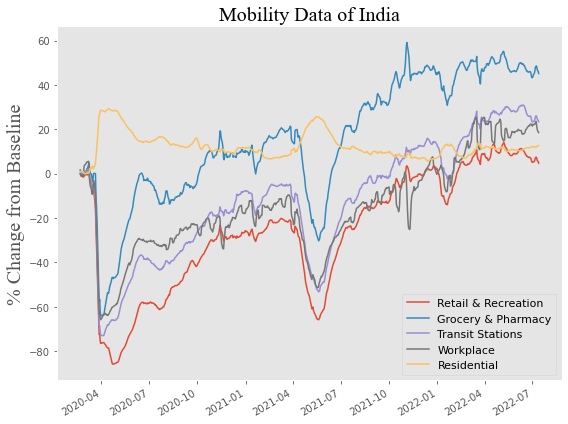

In [13]:
india['retail_mobility'].rolling(7).mean().plot(label='Retail & Recreation', x_compat=True)
india['grocery_mobility'].rolling(7).mean().plot(label='Grocery & Pharmacy')
india['transit_mobility'].rolling(7).mean().plot(label='Transit Stations')
india['workplace_mobility'].rolling(7).mean().plot(label='Workplace')
india['residential_mobility'].rolling(7).mean().plot(label='Residential', figsize=(8,6))

plt.legend(fontsize=11)
plt.xlabel("")
#Changed font using fontname="Times New Roman",fontweight="bold",fontsize=18.0
plt.ylabel('% Change from Baseline',fontname="Times New Roman",fontsize=20.0)
plt.title('Mobility Data of India',fontname="Times New Roman",fontsize=20.0)
plt.grid(visible=None)
plt.tight_layout()
#changed dpi for figure from 150 dpi to 300 dpi
plt.savefig(plot_output_dir+'\\mobility_india.png', dpi=200,bbox_inches="tight")

In [14]:
# mobil[mobil['sub_region_1']=='Delhi'].head()
mobil.replace(np.NaN, -999, inplace=True)

In [15]:
delhi = mobil[(mobil['sub_region_1']=="Delhi") & (mobil['sub_region_2']==-999)]
wb = mobil[(mobil['sub_region_1']=="West Bengal") & (mobil['sub_region_2']==-999)]
tn = mobil[(mobil['sub_region_1']=="Tamil Nadu") & (mobil['sub_region_2']==-999)]
mh = mobil[(mobil['sub_region_1']=="Maharashtra") & (mobil['sub_region_2']==-999)]

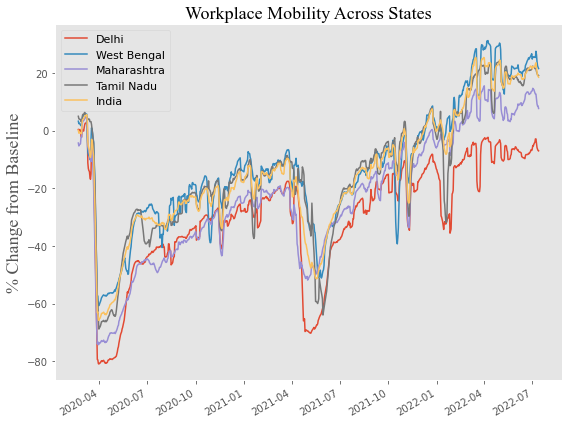

In [16]:
delhi["workplace_mobility"].rolling(7).mean().plot(label='Delhi',x_compat=True)
wb["workplace_mobility"].rolling(7).mean().plot(label='West Bengal')
mh["workplace_mobility"].rolling(7).mean().plot(label='Maharashtra')
tn["workplace_mobility"].rolling(7).mean().plot(label='Tamil Nadu')
india["workplace_mobility"].rolling(7).mean().plot(label='India', figsize=(8,6))

plt.xlabel("")
plt.legend(fontsize=11)
#Changed font using fontname="Times New Roman",fontweight="bold",fontsize=18.0
plt.ylabel('% Change from Baseline',fontname="Times New Roman",fontsize=18.0)
plt.title('Workplace Mobility Across States',fontname="Times New Roman",fontsize=18.0)
plt.grid(visible=None)
plt.tight_layout()
#changed dpi for figure from 150 dpi to 500 dpi
plt.savefig(plot_output_dir+'\\workplace mobility india.png', dpi=500, bbox_inches='tight')

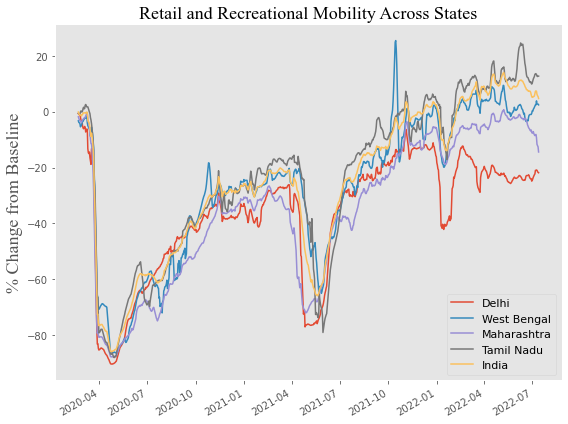

In [17]:
delhi["retail_mobility"].rolling(7).mean().plot(label='Delhi',x_compat=True)
wb["retail_mobility"].rolling(7).mean().plot(label='West Bengal')
mh["retail_mobility"].rolling(7).mean().plot(label='Maharashtra')
tn["retail_mobility"].rolling(7).mean().plot(label='Tamil Nadu')
india["retail_mobility"].rolling(7).mean().plot(label='India', figsize=(8,6))

plt.xlabel("")
plt.legend(fontsize=11)
plt.ylabel('% Change from Baseline',fontname="Times New Roman",fontsize=18.0)
plt.grid(visible=None)
plt.title('Retail and Recreational Mobility Across States',fontname="Times New Roman",fontsize=18.0)
plt.tight_layout()
#changed dpi for figure from 150 dpi to 300 dpi
plt.savefig(plot_output_dir+"\\retail_mobil.png", dpi=500, bbox_inches='tight')

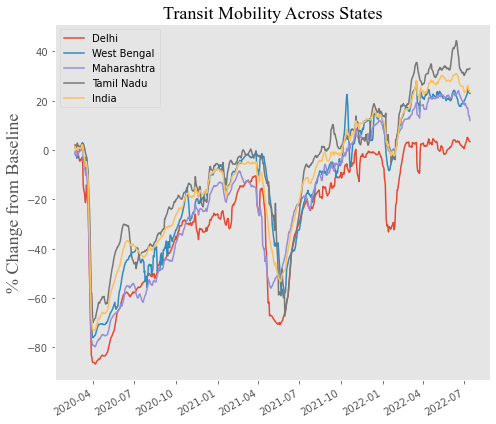

In [18]:
delhi["transit_mobility"].rolling(7).mean().plot(label='Delhi', x_compat=True)
wb["transit_mobility"].rolling(7).mean().plot(label='West Bengal')
mh["transit_mobility"].rolling(7).mean().plot(label='Maharashtra')
tn["transit_mobility"].rolling(7).mean().plot(label='Tamil Nadu')
india["transit_mobility"].rolling(7).mean().plot(label='India', figsize=(7,6))

plt.xlabel("")
plt.legend()
plt.ylabel('% Change from Baseline',fontname="Times New Roman",fontsize=18.0)
plt.title('Transit Mobility Across States',fontname="Times New Roman",fontsize=18.0)
plt.grid(visible=None)
plt.tight_layout()
plt.savefig('transit station mobility india.png', dpi=500, bbox_inches='tight')
#changed dpi for figure from 150 dpi to 500 dpi
plt.savefig(plot_output_dir+"\\transit_mobil.png", dpi=500, bbox_inches='tight')

In [19]:
master_mobil_df = pd.DataFrame(
{
    "india_retail_mobility":india['retail_mobility'].rolling(7).mean(),
    "india_grocery_mobility":india['grocery_mobility'].rolling(7).mean(),
    "india_transit_mobility":india['transit_mobility'].rolling(7).mean(),
    "india_workplace_mobility":india['workplace_mobility'].rolling(7).mean(),
    "india_residential_mobility":india['residential_mobility'].rolling(7).mean(),
    "delhi_retail_mobility":delhi["retail_mobility"].rolling(7).mean(),
    "wb_retail_mobility":wb["retail_mobility"].rolling(7).mean(),
    "mh_retail_mobility":mh["retail_mobility"].rolling(7).mean(),
    "tn_retail_mobility":tn["retail_mobility"].rolling(7).mean(),
    "dl_workplace_mobility":delhi["workplace_mobility"].rolling(7).mean(),
    "wb_workplace_mobility":wb["workplace_mobility"].rolling(7).mean(),
    "mh_workplace_mobility":mh["workplace_mobility"].rolling(7).mean(),
    "tn_workplace_mobility":tn["workplace_mobility"].rolling(7).mean(),
    "dl_transit_mobility":delhi["transit_mobility"].rolling(7).mean(),
	"wb_transit_mobility":wb["transit_mobility"].rolling(7).mean(),
	"mh_transit_mobility":mh["transit_mobility"].rolling(7).mean(),
	"tn_transit_mobility":tn["transit_mobility"].rolling(7).mean()
}
)

In [20]:
master_mobil_df.to_csv(data_output_dir+"\\google_mobility.csv")

## Apple mobility

file available under "all data csv" at https://covid19.apple.com/mobility

In [26]:
path = "https://covid19-static.cdn-apple.com/covid19-mobility-data/2211HotfixDev16/v3/en-us/applemobilitytrends-2022-04-08.csv"

apple_mobil_city = pd.read_csv(path,parse_dates=True).query("geo_type=='city'").query("region==['Bangalore', 'Delhi', 'Chennai', 'Hyderabad', 'Mumbai', 'Pune']").drop(['geo_type', 'alternative_name', 'sub-region', 'country'], axis=1)

HTTPError: HTTP Error 404: Not Found

In [21]:
city_driving = pd.DataFrame({
    "date" : apple_mobil_city.T.iloc[2:].index,
    "Bangalore" : apple_mobil_city.T.iloc[2:, 0],
    "Chennai" : apple_mobil_city.T.iloc[2:, 2],
    "Delhi" : apple_mobil_city.T.iloc[2:, 4],
    "Hyderabad" : apple_mobil_city.T.iloc[2:, 6],
    "Mumbai" : apple_mobil_city.T.iloc[2:, 8],
    "Pune" : apple_mobil_city.T.iloc[2:, 10],
})

In [22]:
city_driving.set_index("date", inplace=True)

city_driving.index = pd.to_datetime(city_driving.index)

city_driving.dropna(inplace=True)

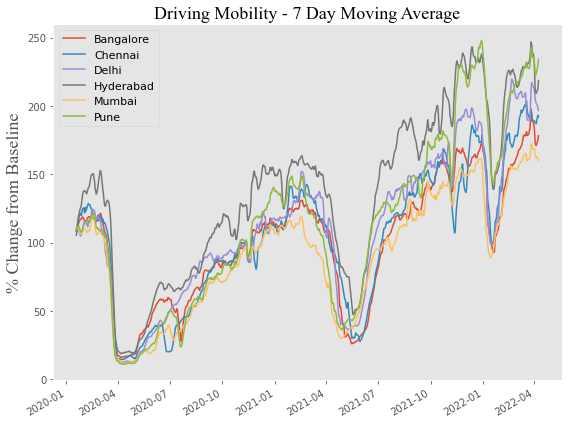

In [23]:
city_driving.rolling(7).mean().plot(figsize=(8,6))
plt.xlabel("")
plt.legend(fontsize=11)
plt.ylabel('% Change from Baseline',fontname="Times New Roman",fontsize=18.0)
plt.title('Driving Mobility - 7 Day Moving Average',fontname="Times New Roman",fontsize=18.0)
plt.grid(visible=False)
plt.tight_layout()


plt.savefig(plot_output_dir+'\\driving.png', dpi=500, bbox_inches='tight')


In [24]:
city_driving.rolling(7).mean().to_csv(data_output_dir+"\\driving_mobil.csv")

## Stringency

In [21]:
owid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', index_col="date", parse_dates=True)

<AxesSubplot:xlabel='date'>

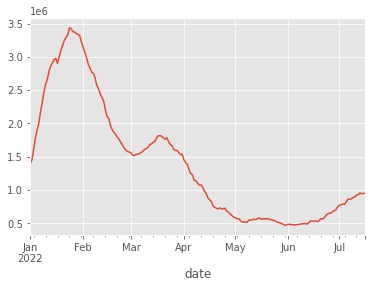

In [22]:
owid[owid['location']=="World"]['new_cases_smoothed']['2022-01-01':].plot()

In [23]:
ind = owid[owid['location']=='India']
ind = owid[owid['location']=='France']

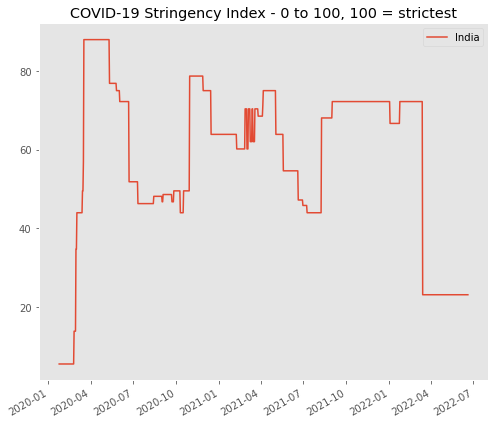

In [27]:
ind[ind['stringency_index'].notna()]['stringency_index'].plot(label='India', figsize=(7,6), x_compat=True)

plt.legend()
plt.title('COVID-19 Stringency Index - 0 to 100, 100 = strictest')
plt.grid(visible=False)
plt.xlabel("")

plt.tight_layout()
plt.savefig(plot_output_dir+'\\stringency.png', dpi=100)


## WHO Covid Cases

In [28]:
who = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv', index_col='Date_reported', parse_dates=True)

In [29]:
who.columns = who.columns.str.strip()

In [30]:
ind = who[who['Country_code']=='IN']
fr = who[who['Country_code']=='FR']
ar = who[who['Country_code']=='AR']
usa = who[who['Country_code']=='US']
china = who[who['Country_code']=='CN']
italy = who[who['Country_code']=='IT']
uk = who[who['Country_code']=='GB']
spain = who[who['Country_code']=='ES']
russia = who[who['Country_code']=='RU']
brazil = who[who['Country_code']=='BR']
eur = who[who['WHO_region']=='EURO']

In [31]:
uk = uk[uk['New_cases']!=0]

In [32]:
ind['New_cases'].rolling(7).mean()

Date_reported
2020-01-03             NaN
2020-01-04             NaN
2020-01-05             NaN
2020-01-06             NaN
2020-01-07             NaN
                  ...     
2022-07-11    17252.142857
2022-07-12    17327.714286
2022-07-13    17434.428571
2022-07-14    17607.142857
2022-07-15    17781.857143
Name: New_cases, Length: 925, dtype: float64

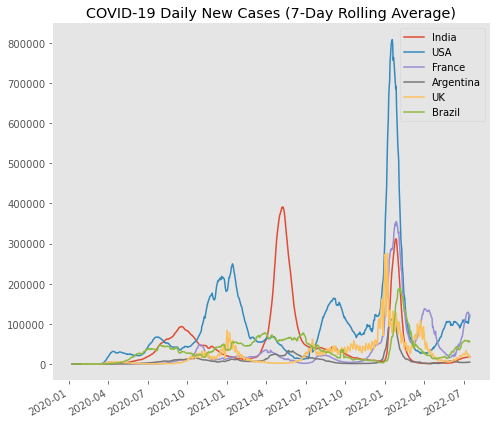

In [33]:
ind['New_cases'].rolling(7).mean().plot(label='India', x_compat=True)
usa['New_cases'].rolling(7).mean().plot(label='USA', x_compat=True)
fr['New_cases'].rolling(7).mean().plot(label='France', x_compat=True)
# spain['New_cases'].rolling(7).mean().plot(label='Spain', x_compat=True)
ar['New_cases'].rolling(7).mean().plot(label='Argentina', x_compat=True)
# eur['New_cases'].plot(label='Europe')
# italy['New_cases'].plot(label='Italy')
uk['New_cases'].plot(label='UK')
# spain['New_cases'].plot(label='Spain', figsize=(7,6))
# russia['New_cases'].plot(label='Russia', figsize=(7,6))
brazil['New_cases'].rolling(7).mean().plot(label='Brazil', figsize=(7,6), x_compat=True)

plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(visible=False)
plt.xlabel('')
# plt.ylabel('Rs. Million')
plt.title('COVID-19 Daily New Cases (7-Day Rolling Average)')
plt.tight_layout()
# plt.grid(b=True, linewidth=0.5)
plt.savefig(plot_output_dir+'\\newcases.png', dpi=300, bbox_inches='tight')


plt.show()

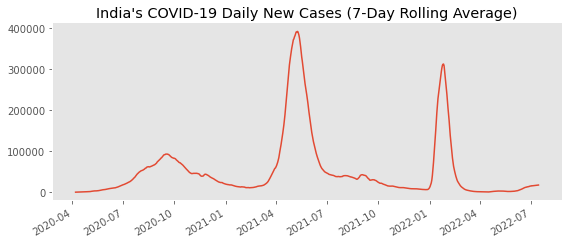

In [34]:
ind['New_cases']['2020-04-01':].rolling(7).mean().plot(label='India', x_compat=True, figsize=(8,3.5))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(visible=False)
plt.xlabel('')
# plt.ylabel('Rs. Million')
plt.title("India's COVID-19 Daily New Cases (7-Day Rolling Average)")
plt.tight_layout()
# plt.grid(b=True, linewidth=0.5)
plt.savefig(plot_output_dir+'\\cow12feb.png', dpi=300, bbox_inches='tight')


plt.show()

In [35]:
master_covid_df = pd.DataFrame({
    "ind_cum_cases":ind['Cumulative_cases'],
    "usa_cum_cases":usa['Cumulative_cases'],
    "brazil_cum_cases":brazil['Cumulative_cases'],
    "russia_cum_cases":russia['Cumulative_cases'],
    "ind_new_cases":ind['New_cases'],
    "usa_new_cases":usa['New_cases'],
    "china_new_cases":china['New_cases'],
    "russia_new_cases":russia['New_cases'],
    "brazil_new_cases":brazil['New_cases']
})

In [36]:
master_covid_df.to_csv(data_output_dir+"\\covid_who.csv")

In [37]:
emro = who[who['WHO_region']=='EMRO']
emro_df = emro.groupby(emro.index).sum()['New_cases']

wpro = who[who['WHO_region']=='WPRO']
wpro_df = wpro.groupby(wpro.index).sum()['New_cases']

other = who[who['WHO_region']=='Other']
other_df = other.groupby(other.index).sum()['New_cases']

afro = who[who['WHO_region']=='AFRO']
afro_df = afro.groupby(afro.index).sum()['New_cases']

amro = who[who['WHO_region']=='AMRO']
amro_df = amro.groupby(amro.index).sum()['New_cases']

euro = who[who['WHO_region']=='EURO']
euro_df = euro.groupby(euro.index).sum()['New_cases']


searo = who[who['WHO_region']=='SEARO']
searo_df = searo.groupby(searo.index).sum()['New_cases']



In [38]:
amro_df = amro_df[amro_df>0]
searo_df = searo_df[searo_df>0]
wpro_df = wpro_df[wpro_df>0]
euro_df = euro_df[euro_df>0]

In [39]:
region_wise_areaplot_df = pd.DataFrame({
    "Western Pacific": wpro_df,
    "Africa":afro_df,
    "Eastern Mediterranean": emro_df,
    "Europe": euro_df,
    "South-East Asia": searo_df,
    "Americas": amro_df,
    # "Other":other_df
})

In [40]:
region_wise_areaplot_df = region_wise_areaplot_df/1000000

In [41]:
region_wise_areaplot_df_7dma = region_wise_areaplot_df.rolling(7).mean().dropna()
# region_wise_areaplot_df_7dma = region_wise_areaplot_df_7dma/1000

In [42]:
region_wise_areaplot_df.rolling(7).mean().dropna()
region_wise_areaplot_df.tail()

# df_list= ['Western Pacific', 'Africa','Eastern Mediterranean','Europe','South East Asia', 'Americas']
#region_wise_areaplot_df ['Sum Of All Regions']= region_wise_areaplot_df.sum(axis=1)
#region_wise_areaplot_df.drop('Sum Of All Regions', inplace=True, axis=1)
region_wise_areaplot_df.tail(15)


,Western Pacific,Africa,Eastern Mediterranean,Europe,South-East Asia,Americas
Date_reported,,,,,,
2022-07-01,0.157238,0.003312,0.014601,0.453920,0.023469,0.281774
2022-07-02,0.116335,0.003622,0.013809,0.504352,0.023707,0.297530
2022-07-03,0.089752,0.001796,0.013438,0.384355,0.022020,0.333022
2022-07-04,0.144194,0.001522,0.015221,0.270802,0.021920,0.117846
2022-07-05,0.117903,0.002341,0.012428,0.296412,0.019691,0.086007
2022-07-06,0.155848,0.001934,0.030307,0.697790,0.023173,0.142324
2022-07-07,0.150210,0.005098,0.016914,0.524268,0.026082,0.294716
2022-07-08,0.175212,0.001906,0.016530,0.526413,0.025187,0.277877
2022-07-09,0.185571,0.004005,0.016574,0.533311,0.025471,0.326597


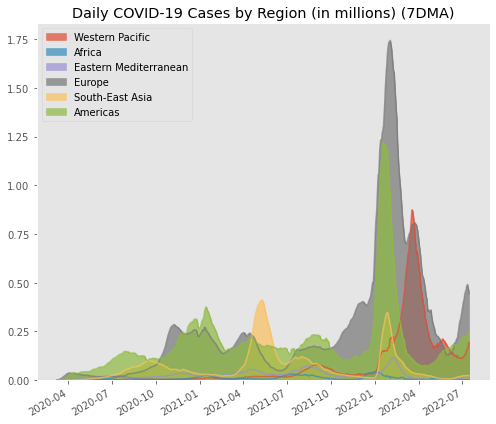

In [45]:
region_wise_areaplot_df_7dma.plot.area(stacked=False, figsize=(7,6), alpha=0.7, x_compat=True)


##changed to stacked false=since africa was showing negative values 
plt.title("Daily COVID-19 Cases by Region (in millions) (7DMA)")
plt.xlabel("")
plt.grid(visible=False)
plt.tight_layout()
plt.savefig(plot_output_dir+'\\daily_region_covid.png', dpi=150, bbox_inches='tight')


In [44]:
ind_owid_pos = owid[owid['location']=="India"]['positive_rate']

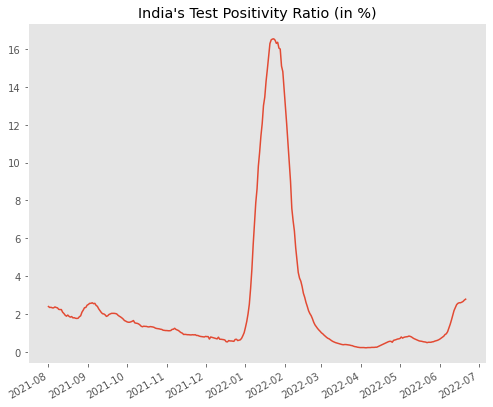

In [46]:
(ind_owid_pos['2021-08':]*100).dropna().plot(figsize=(7,6), x_compat=True)

plt.title("India's Test Positivity Ratio (in %)")
plt.grid(visible=False)
plt.tight_layout()
plt.xlabel("")
plt.savefig(plot_output_dir+"\\india_tpr.png", dpi=200)


In [47]:
ind_owid_pos.tail(14)

date
2022-07-03   NaN
2022-07-04   NaN
2022-07-05   NaN
2022-07-06   NaN
2022-07-07   NaN
2022-07-08   NaN
2022-07-09   NaN
2022-07-10   NaN
2022-07-11   NaN
2022-07-12   NaN
2022-07-13   NaN
2022-07-14   NaN
2022-07-15   NaN
2022-07-16   NaN
Name: positive_rate, dtype: float64

In [48]:
vacc_countries = ['United States', 'United Kingdom', 'India', 'Germany', 'China']

In [49]:
vacc_countries2 = ['United States', 'United Kingdom', 'India', 'Germany']

In [50]:
owid_filt = owid[owid['location'].isin(vacc_countries)]

owid_filt = owid_filt[['location', 'new_vaccinations_smoothed_per_million', 'new_vaccinations_smoothed', 'total_vaccinations', 'total_vaccinations_per_hundred', 'people_fully_vaccinated_per_hundred']]

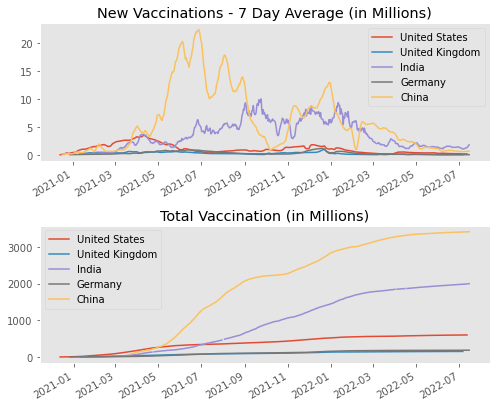

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,6))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i in vacc_countries:
    ax = ((owid_filt[owid_filt['location']==i]['new_vaccinations_smoothed'])/1000000).plot(x_compat=True, label=i, figsize=(7,6), ax=axes[0])
ax.set_title("New Vaccinations - 7 Day Average (in Millions)")
plt.tight_layout()
ax.legend()
ax.grid(False)
# plt.legend(bbox_to_anchor=(1.05,1))
ax.set_xlabel("")

for i in vacc_countries:
    ax2 = ((owid_filt[owid_filt['location']==i]['total_vaccinations'])/1000000).plot(x_compat=True, label=i, figsize=(7,6), ax=axes[1])

ax2.set_title("Total Vaccination (in Millions)")
plt.tight_layout()
ax2.legend()
# plt.legend(bbox_to_anchor=(1.05,1))
ax2.set_xlabel("")

plt.grid(visible=False)
plt.savefig(plot_output_dir+'\\vaccines_new.png', dpi=300)

In [52]:
((owid_filt[owid_filt['location']=="India"]['new_vaccinations_smoothed'])/1000000)

date
2020-01-30         NaN
2020-01-31         NaN
2020-02-01         NaN
2020-02-02         NaN
2020-02-03         NaN
                ...   
2022-07-12    1.297224
2022-07-13    1.436477
2022-07-14    1.655635
2022-07-15    1.804422
2022-07-16         NaN
Name: new_vaccinations_smoothed, Length: 899, dtype: float64

In [49]:
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,6))
# plt.subplots_adjust(wspace=0.2, hspace=0.5)

# for i in vacc_countries2:
#     ax = ((owid_filt[owid_filt['location']==i]['new_vaccinations_smoothed'])/1000000).plot(x_compat=True, label=i, figsize=(7,6), ax=axes[0])
# ax.set_title("New Vaccinations - 7 Day Average (in Millions)")
# plt.tight_layout()
# ax.grid(False)
# ax.legend()
# # plt.legend(bbox_to_anchor=(1.05,1))
# ax.set_xlabel("")

# for i in vacc_countries2:
#     ax2 = ((owid_filt[owid_filt['location']==i]['total_vaccinations'])/1000000).plot(x_compat=True, label=i, figsize=(7,6), ax=axes[1])

# ax2.set_title("Total Vaccination (in Millions)")
# plt.tight_layout()
# ax2.legend()
# ax2.grid(False)
# # plt.legend(bbox_to_anchor=(1.05,1))
# ax2.set_xlabel("")



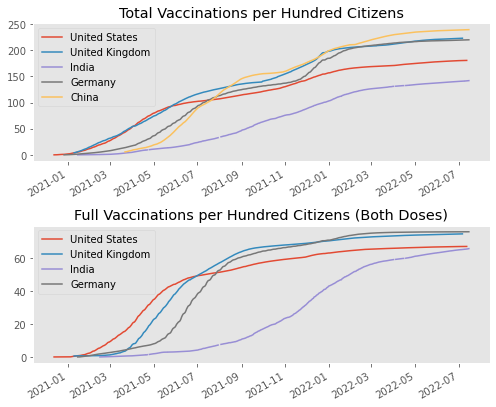

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,6))
plt.subplots_adjust(wspace=0.2, hspace=0.5)


for i in vacc_countries:
    ax1 = owid_filt[owid_filt['location']==i]['total_vaccinations_per_hundred'].plot(x_compat=True, label=i, figsize=(7,6), ax=axes[0])

ax1.set_title("Total Vaccinations per Hundred Citizens")
plt.tight_layout()
ax1.legend()
ax1.grid(False)
# plt.legend(bbox_to_anchor=(1.05,1))
ax1.set_xlabel("")

for i in vacc_countries2:
    ax2 = owid_filt[owid_filt['location']==i]['people_fully_vaccinated_per_hundred'].plot(x_compat=True,
    label=i, figsize=(7,6), ax = axes[1])

ax2.set_title("Full Vaccinations per Hundred Citizens (Both Doses)")
plt.tight_layout()
ax2.legend()
ax2.grid(False)
# plt.legend(bbox_to_anchor=(1.05,1))
ax2.set_xlabel("")

plt.savefig(plot_output_dir+"\\total_vaccines_100.png", dpi=300, bbox_inches='tight')

In [54]:
owid_filt[owid_filt['location']=="India"]['total_vaccinations_per_hundred'].tail()

date
2022-07-12    141.32
2022-07-13    141.47
2022-07-14    141.68
2022-07-15    141.87
2022-07-16       NaN
Name: total_vaccinations_per_hundred, dtype: float64

In [55]:
owid_filt[owid_filt['location']=="India"]['people_fully_vaccinated_per_hundred'].tail()

date
2022-07-12    65.48
2022-07-13    65.55
2022-07-14    65.68
2022-07-15    65.74
2022-07-16      NaN
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [56]:
owid_filt[owid_filt['location']=="India"]['new_vaccinations_smoothed'].tail()

date
2022-07-12    1297224.0
2022-07-13    1436477.0
2022-07-14    1655635.0
2022-07-15    1804422.0
2022-07-16          NaN
Name: new_vaccinations_smoothed, dtype: float64

In [79]:
owid_filt.to_csv(data_output_dir+"\\global_vacc.csv")
